In [1]:
# Part A Conduct an logistic regression analysis on pima diabetics dataset 

In [ ]:
# Part B Probit regression on NSSO data

In [ ]:
# Part C Tobit Regression on NSSO data 

In [8]:
pip install missingno


     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

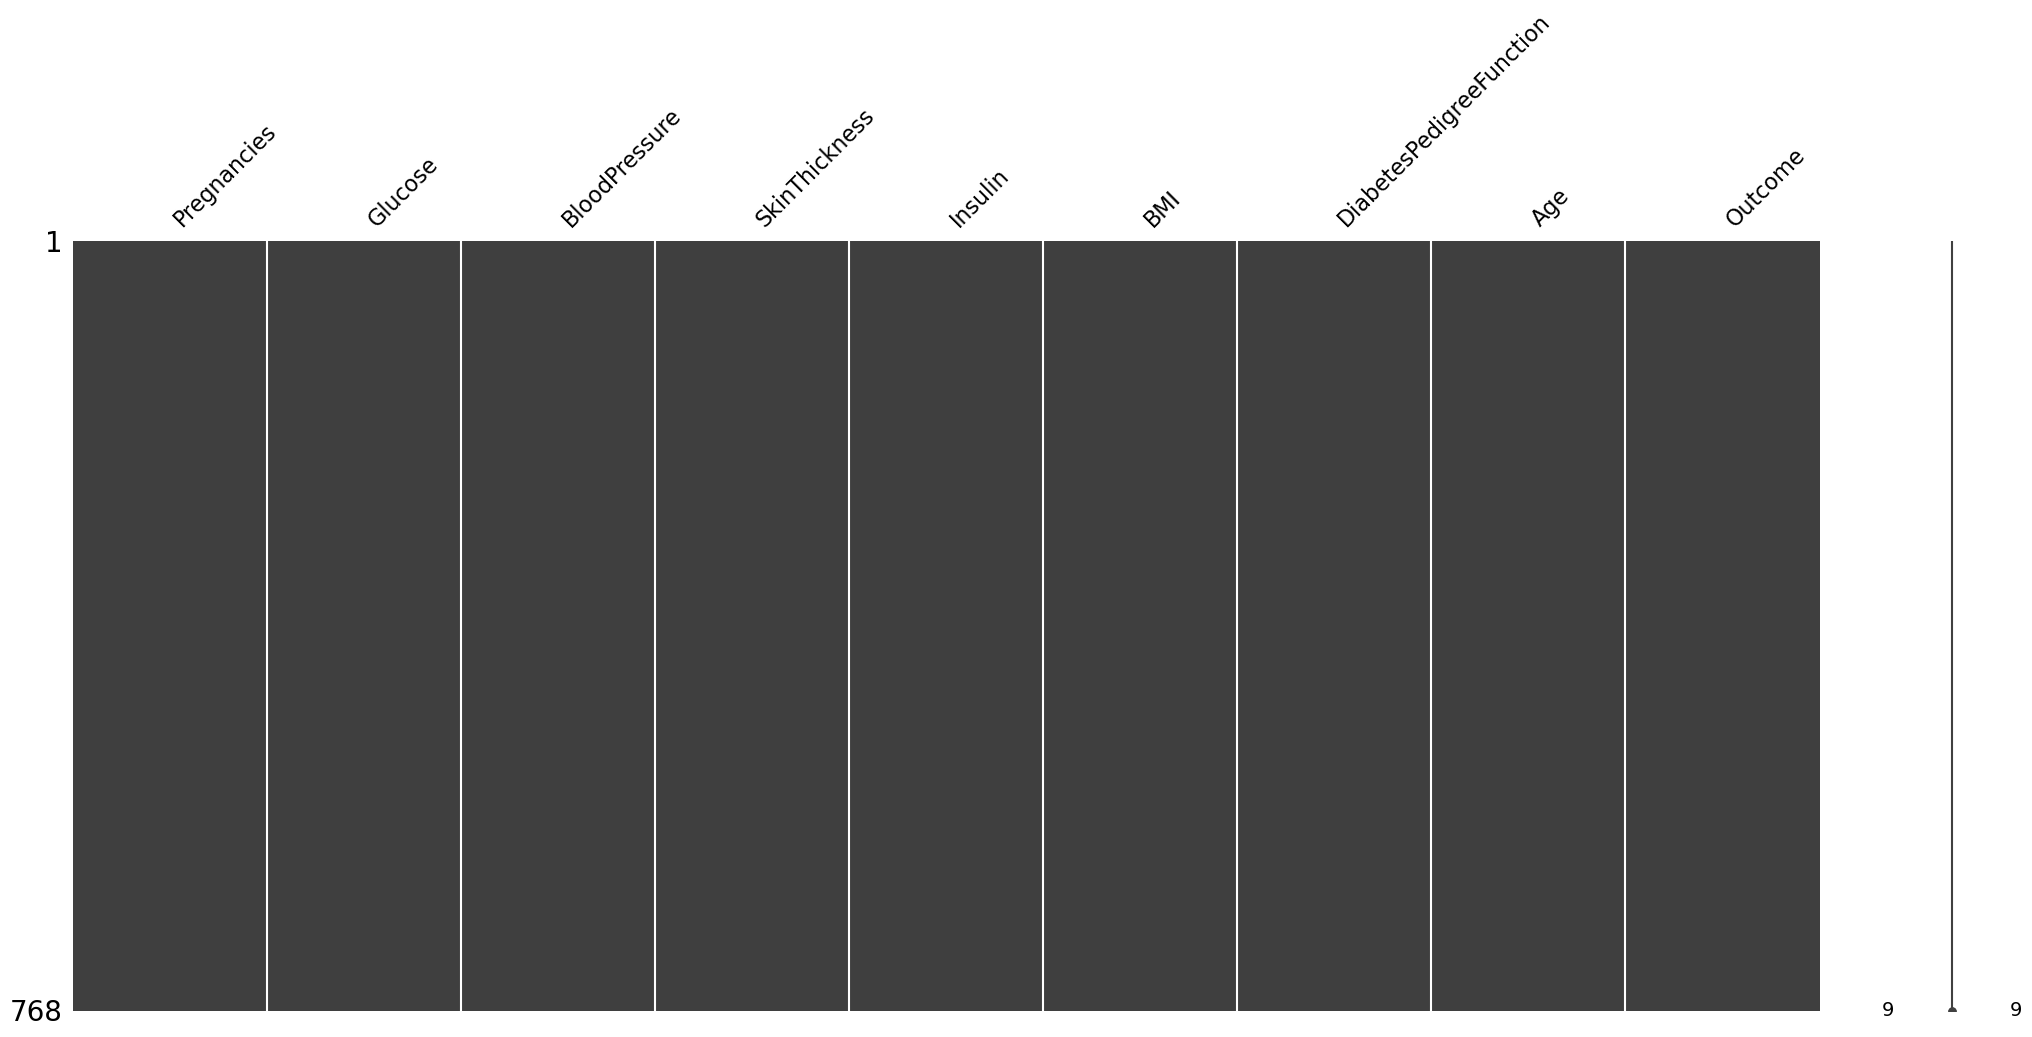

In [9]:
import pandas as pd

# Ensure missingno is installed and imported correctly
try:
    import missingno as msno
except ImportError:
    import subprocess
    subprocess.check_call(["pip", "install", "missingno"])
    import missingno as msno

# Load the dataset
dia = pd.read_csv("C:\\Users\\Chand\\Downloads\\pima-diabetes.csv")

# Display the dataframe
print(dia)

# Summary of the dataframe
print(dia.describe())

# Plot missing values
msno.matrix(dia)

# Sum of missing values
print(dia.isna().sum())

# Display the first few rows
print(dia.head())

# Display the last few rows
print(dia.tail())

# Display the column names
print(dia.columns)

# Display the structure of the dataframe
print(dia.info())


Missing Values Information:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report
import statsmodels.api as sm

In [16]:
pip install pandas numpy seaborn matplotlib scikit-learn statsmodels

Note: you may need to restart the kernel to use updated packages.


In [17]:
# Correlation matrix , heatmap for it , boxplot with dependance and independant variable , splitting the data , Logistic regression , confusion matrix , ROC curve 

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221

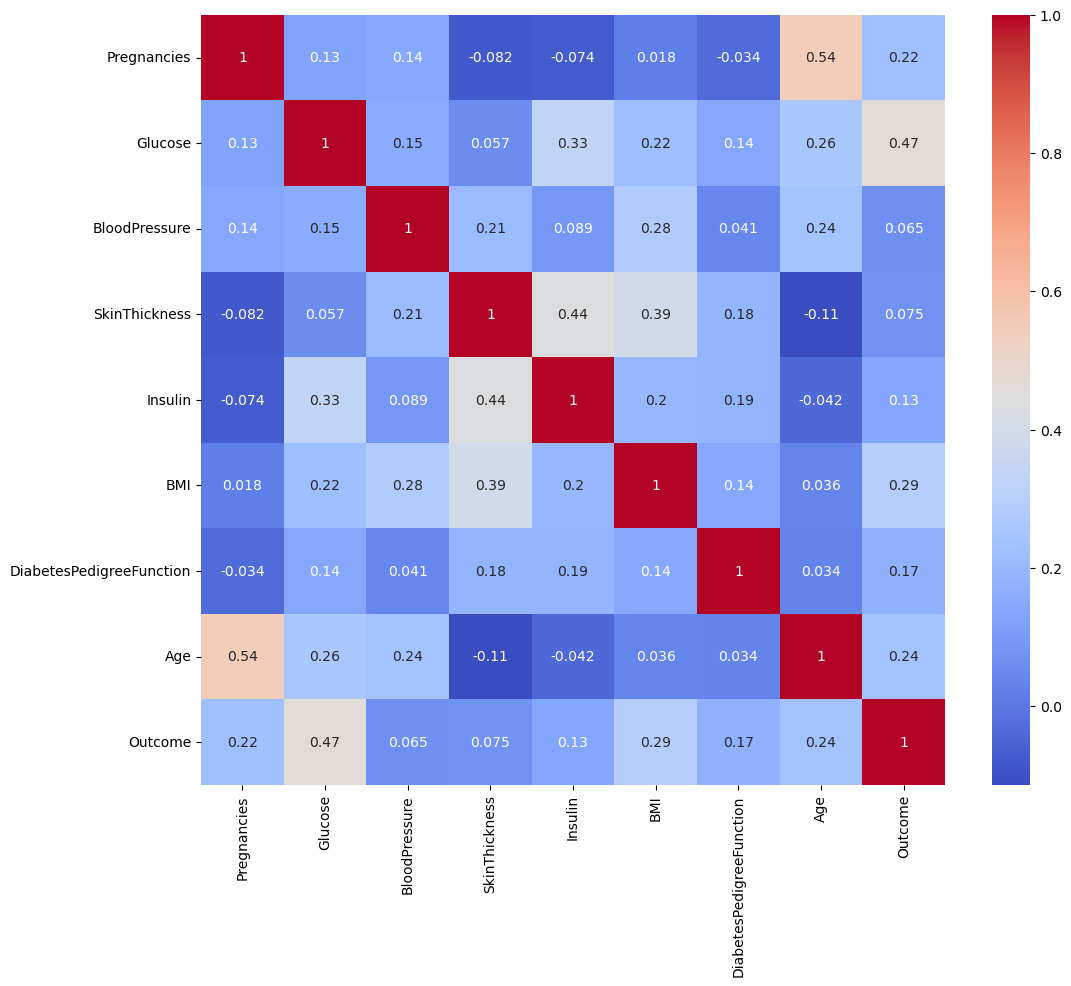

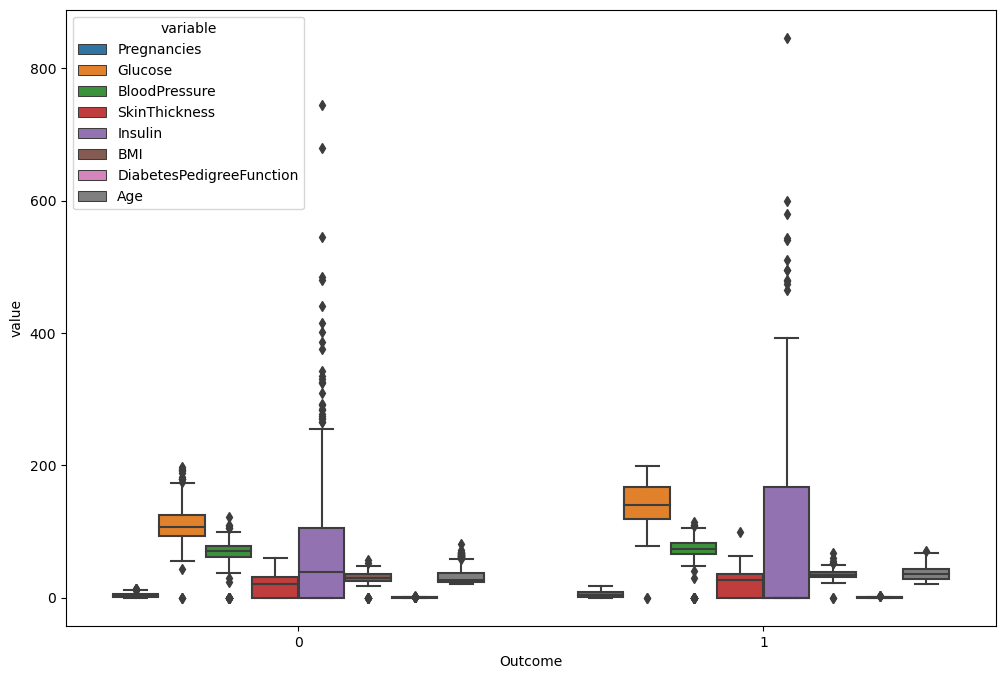

Confusion Matrix:
 [[120  31]
 [ 30  50]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.79      0.80       151
           1       0.62      0.62      0.62        80

    accuracy                           0.74       231
   macro avg       0.71      0.71      0.71       231
weighted avg       0.74      0.74      0.74       231



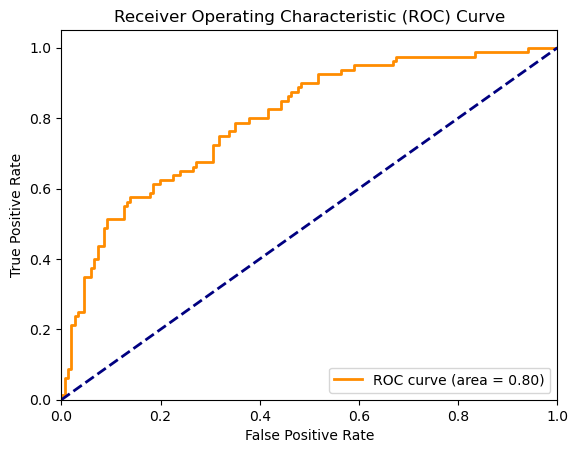

Optimization terminated successfully.
         Current function value: 0.459388
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                Outcome   No. Observations:                  537
Model:                          Logit   Df Residuals:                      528
Method:                           MLE   Df Model:                            8
Date:                Sun, 30 Jun 2024   Pseudo R-squ.:                  0.2905
Time:                        08:54:28   Log-Likelihood:                -246.69
converged:                       True   LL-Null:                       -347.71
Covariance Type:            nonrobust   LLR p-value:                 2.378e-39
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -9.4451      0.915    -10.321      0.000     -11.239

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report
import statsmodels.api as sm

# Load the dataset
dia = pd.read_csv("C:\\Users\\Chand\\Downloads\\pima-diabetes.csv")

# Replace missing values with the mean for numeric columns
dia = dia.apply(lambda col: col.fillna(col.mean()) if col.dtype.kind in 'bifc' else col)

# Correlation matrix
cor_matrix = dia.corr()
print(cor_matrix)

# Heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(cor_matrix, annot=True, cmap='coolwarm')
plt.show()

# Boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(x='Outcome', y='value', hue='variable', data=pd.melt(dia, id_vars='Outcome'))
plt.show()

# Split the data into training and test sets
X = dia.drop(columns=['Outcome'])
y = dia['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Logistic regression
log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train, y_train)

# Predict on test data
y_pred = log_reg.predict(X_test)
y_pred_prob = log_reg.predict_proba(X_test)[:, 1]

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Logistic regression with statsmodels for detailed analysis
logit_model = sm.Logit(y_train, sm.add_constant(X_train))
result = logit_model.fit()
print(result.summary())


In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report, roc_auc_score
from sklearn.preprocessing import StandardScaler

Confusion Matrix:
 [[128  15]
 [ 32  56]]


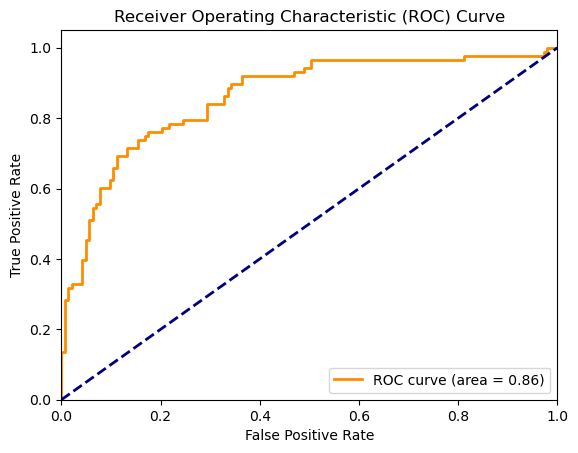

AUC-ROC: 0.8610934520025428


In [25]:
# Replace missing values with the mean for numeric columns
dia = dia.apply(lambda col: col.fillna(col.mean()) if col.dtype.kind in 'bifc' else col)

# Split the data into training and test sets
X = dia.drop(columns=['Outcome'])
y = dia['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Logistic Regression
log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train, y_train)
predicted_probs = log_reg.predict_proba(X_test)[:, 1]
predicted_class = (predicted_probs >= 0.5).astype(int)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, predicted_class)
print("Confusion Matrix:\n", conf_matrix)

# ROC and AUC
roc_auc = roc_auc_score(y_test, predicted_probs)
fpr, tpr, _ = roc_curve(y_test, predicted_probs)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

print(f"AUC-ROC: {roc_auc}")


Decision Tree Confusion Matrix:
 [[103  40]
 [ 33  55]]


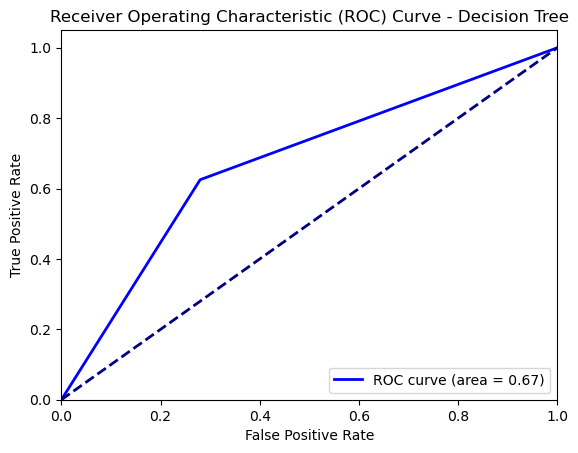

AUC-ROC (Decision Tree): 0.6726398601398601
Logistic Regression vs Decision Tree
Confusion Matrix (Logistic Regression):
 [[128  15]
 [ 32  56]]
Confusion Matrix (Decision Tree):
 [[103  40]
 [ 33  55]]
AUC-ROC (Logistic Regression): 0.8610934520025428
AUC-ROC (Decision Tree): 0.6726398601398601


In [22]:
# Decision Tree Analysis
decision_tree = DecisionTreeClassifier(random_state=123)
decision_tree.fit(X_train, y_train)
dt_predicted_class = decision_tree.predict(X_test)
dt_predicted_probs = decision_tree.predict_proba(X_test)[:, 1]

# Confusion Matrix for Decision Tree
dt_conf_matrix = confusion_matrix(y_test, dt_predicted_class)
print("Decision Tree Confusion Matrix:\n", dt_conf_matrix)

# ROC and AUC for Decision Tree
dt_roc_auc = roc_auc_score(y_test, dt_predicted_probs)
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_predicted_probs)
plt.figure()
plt.plot(dt_fpr, dt_tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % dt_roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Decision Tree')
plt.legend(loc="lower right")
plt.show()

print(f"AUC-ROC (Decision Tree): {dt_roc_auc}")

# Compare the results
print("Logistic Regression vs Decision Tree")
print("Confusion Matrix (Logistic Regression):\n", conf_matrix)
print("Confusion Matrix (Decision Tree):\n", dt_conf_matrix)
print(f"AUC-ROC (Logistic Regression): {roc_auc}")
print(f"AUC-ROC (Decision Tree): {dt_roc_auc}")

Confusion Matrix (Logistic Regression):
 [[128  15]
 [ 32  56]]


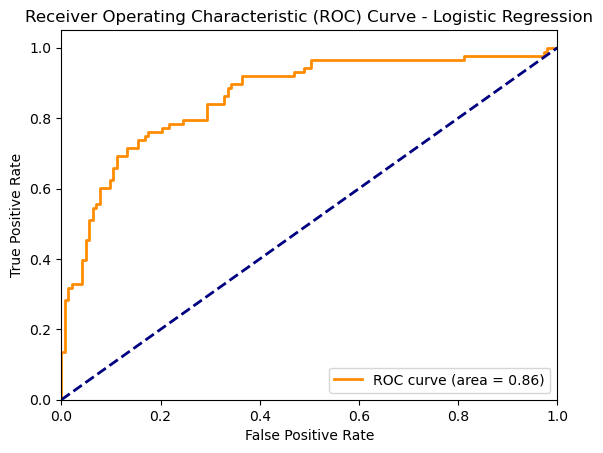

AUC-ROC (Logistic Regression): 0.8610934520025428
Confusion Matrix (Decision Tree):
 [[103  40]
 [ 33  55]]


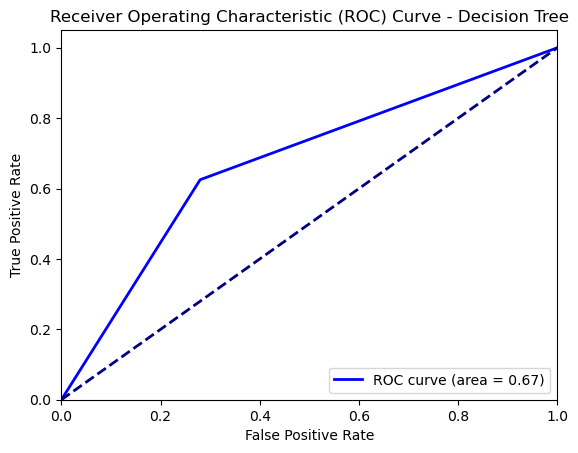

AUC-ROC (Decision Tree): 0.6726398601398601
Logistic Regression vs Decision Tree
Confusion Matrix (Logistic Regression):
 [[128  15]
 [ 32  56]]
Confusion Matrix (Decision Tree):
 [[103  40]
 [ 33  55]]
AUC-ROC (Logistic Regression): 0.8610934520025428
AUC-ROC (Decision Tree): 0.6726398601398601


In [26]:
# Replace missing values with the mean for numeric columns
dia = dia.apply(lambda col: col.fillna(col.mean()) if col.dtype.kind in 'bifc' else col)

# Split the data into training and test sets
X = dia.drop(columns=['Outcome'])
y = dia['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Logistic Regression
log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train, y_train)
predicted_probs_log_reg = log_reg.predict_proba(X_test)[:, 1]
predicted_class_log_reg = (predicted_probs_log_reg >= 0.5).astype(int)

# Confusion Matrix for Logistic Regression
conf_matrix_log_reg = confusion_matrix(y_test, predicted_class_log_reg)
print("Confusion Matrix (Logistic Regression):\n", conf_matrix_log_reg)

# ROC and AUC for Logistic Regression
roc_auc_log_reg = roc_auc_score(y_test, predicted_probs_log_reg)
fpr_log_reg, tpr_log_reg, _ = roc_curve(y_test, predicted_probs_log_reg)
plt.figure()
plt.plot(fpr_log_reg, tpr_log_reg, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_log_reg)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Logistic Regression')
plt.legend(loc="lower right")
plt.show()

print(f"AUC-ROC (Logistic Regression): {roc_auc_log_reg}")

# Decision Tree Analysis
decision_tree = DecisionTreeClassifier(random_state=123)
decision_tree.fit(X_train, y_train)
predicted_probs_tree = decision_tree.predict_proba(X_test)[:, 1]
predicted_class_tree = (predicted_probs_tree >= 0.5).astype(int)

# Confusion Matrix for Decision Tree
conf_matrix_tree = confusion_matrix(y_test, predicted_class_tree)
print("Confusion Matrix (Decision Tree):\n", conf_matrix_tree)

# ROC and AUC for Decision Tree
roc_auc_tree = roc_auc_score(y_test, predicted_probs_tree)
fpr_tree, tpr_tree, _ = roc_curve(y_test, predicted_probs_tree)
plt.figure()
plt.plot(fpr_tree, tpr_tree, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_tree)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Decision Tree')
plt.legend(loc="lower right")
plt.show()

print(f"AUC-ROC (Decision Tree): {roc_auc_tree}")

# Compare the results
print("Logistic Regression vs Decision Tree")
print("Confusion Matrix (Logistic Regression):\n", conf_matrix_log_reg)
print("Confusion Matrix (Decision Tree):\n", conf_matrix_tree)
print(f"AUC-ROC (Logistic Regression): {roc_auc_log_reg}")
print(f"AUC-ROC (Decision Tree): {roc_auc_tree}")